In [1]:
#Important imports 
import torch 
from torch import nn as nn 
from torch.utils.data import DataLoader 
from torch import optim 
import matplotlib.pyplot as plt 
from torch.nn import functional as F 
from torchvision.datasets import ImageFolder 
from torchvision import transforms, models 
import matplotlib.pyplot as plt
#Choosing devide to be gpu if have one, else cpu
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [2]:
transformation = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

In [3]:
directory = "D:\\tekwill_uroki\\AI\\AI_zima\\CNN"

train_data = ImageFolder(rf"{directory}\dataset\training_set", transform=transformation)
test_data = ImageFolder(rf"{directory}\dataset\test_set", transform=transformation)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


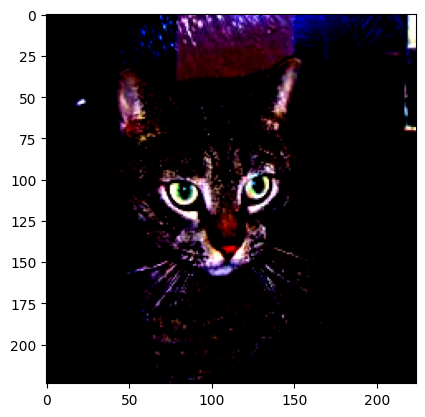

In [4]:
plt.imshow((train_data[0][0]).permute(1,2,0))

In [5]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3,32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = nn.Conv2d(64,128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(128*28*28,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,1)

    def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))
        out = self.flatten(out)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))

        return out


In [6]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)
    
    for epoch in range(n_epochs):
        model.train()
        for example, labels in train_loader:
            example = example.to(DEVICE)
            labels = labels.to(DEVICE)
            
            labels = labels.unsqueeze(1)
            
            output = model(example.float())
            loss = loss_fn(output, labels.float())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        with torch.no_grad():
            for loader, accuracy in [(train_loader, train_accuracy), (test_loader, test_accuracy)]:
                correct = 0
                total = 0
                
                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)
                    
                    outputs = model(examples.float())
                    predicted = torch.round(outputs)
                    
                    total += labels.shape[0]
                    correct += (predicted == labels).sum()
#                print(f"correct - {correct}")
#                print(f"total - {total}")
                accuracy[epoch] = correct / total
        print(f"EPOCH - {epoch+1}", 
              f"Train Accuracy - {train_accuracy[epoch]}",
              f"Test Accuracy - {test_accuracy[epoch]}")
    if print_plot:
        epochs = range(n_epochs)

        #Ploting both curves, train and val 
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [7]:
import numpy as np
train_data = torch.utils.data.Subset(train_data, np.random.choice(len(train_data), 1000, replace=False))
test_data = torch.utils.data.Subset(test_data, np.random.choice(len(test_data), 200, replace=False))


In [8]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

EPOCH - 1 Train Accuracy - 0.5519999861717224 Test Accuracy - 0.5950000286102295
EPOCH - 2 Train Accuracy - 0.6600000262260437 Test Accuracy - 0.6200000047683716
EPOCH - 3 Train Accuracy - 0.7170000076293945 Test Accuracy - 0.6299999952316284
EPOCH - 4 Train Accuracy - 0.7929999828338623 Test Accuracy - 0.6150000095367432
EPOCH - 5 Train Accuracy - 0.859000027179718 Test Accuracy - 0.6800000071525574
EPOCH - 6 Train Accuracy - 0.9110000133514404 Test Accuracy - 0.6800000071525574
EPOCH - 7 Train Accuracy - 0.9340000152587891 Test Accuracy - 0.6499999761581421
EPOCH - 8 Train Accuracy - 0.9929999709129333 Test Accuracy - 0.6299999952316284
EPOCH - 9 Train Accuracy - 0.9980000257492065 Test Accuracy - 0.6650000214576721
EPOCH - 10 Train Accuracy - 0.9990000128746033 Test Accuracy - 0.6299999952316284


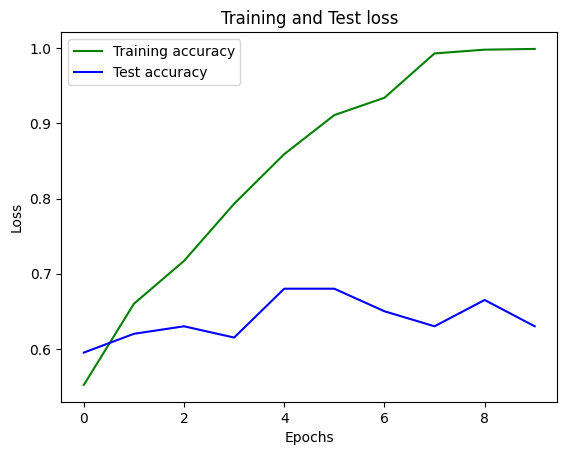

In [ ]:
learning_rate = 1e-3

model = Net().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EPOCH - 1 Train Accuracy - 0.9660000205039978 Test Accuracy - 0.9700000286102295
EPOCH - 2 Train Accuracy - 0.968999981880188 Test Accuracy - 0.9549999833106995
EPOCH - 3 Train Accuracy - 0.9800000190734863 Test Accuracy - 0.9800000190734863
EPOCH - 4 Train Accuracy - 0.9710000157356262 Test Accuracy - 0.9700000286102295
EPOCH - 5 Train Accuracy - 0.9760000109672546 Test Accuracy - 0.9700000286102295
EPOCH - 6 Train Accuracy - 0.9789999723434448 Test Accuracy - 0.9900000095367432
EPOCH - 7 Train Accuracy - 0.9869999885559082 Test Accuracy - 0.9850000143051147
EPOCH - 8 Train Accuracy - 0.9660000205039978 Test Accuracy - 0.9750000238418579
EPOCH - 9 Train Accuracy - 0.9779999852180481 Test Accuracy - 0.9850000143051147
EPOCH - 10 Train Accuracy - 0.9760000109672546 Test Accuracy - 0.9549999833106995


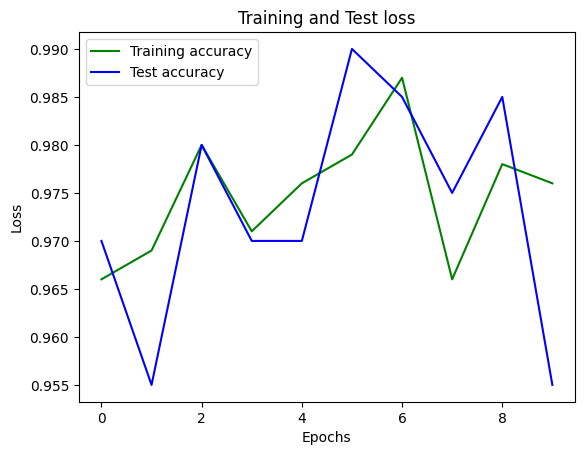

In [9]:
from collections import OrderedDict

model = models.resnet50(pretrained = True)
for param in model.parameters():
    param.requires_grad = False

nr_feat = model.fc.in_features
model.fc = nn.Sequential(OrderedDict([('fc',nn.Linear(nr_feat,1)),('sigmoid',nn.Sigmoid())]))

learning_rate = 1e-3
model = model.to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)
    

In [10]:
model 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 